In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
from IPython.display import Image 

In [5]:
bankdata = pd.read_csv(r'C:\Users\premf\OneDrive\Documents\AIML\Lab Exercise\Project 2\bank-full.csv')

In [5]:
bankdata.shape

(45211, 17)

In [6]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bankdata.describe()
#Below reflects for columns which has only numerical columns

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bankdata.isnull().values.any()

False

In [9]:
bankdata.dtypes
#In the provided data most of the columns are object which needs to be converted for proper model

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
for feature in bankdata.columns:
    if bankdata[feature].dtype == 'object':
        bankdata[feature] = pd.Categorical(bankdata[feature])
bankdata.head()
#Changing the object data type to categorical variable

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
bankdata.dtypes
#Below confirm the data type changes into categorical variable

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [7]:
#Checking the unique values and its counts for categorical variables 
print(bankdata.job.value_counts())
print(bankdata.marital.value_counts())
print(bankdata.education.value_counts())
print(bankdata.default.value_counts())
print(bankdata.housing.value_counts())
print(bankdata.loan.value_counts())
print(bankdata.contact.value_counts())
print(bankdata.month.value_counts())
print(bankdata.poutcome.value_counts())
print(bankdata.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [8]:
replaceStruct = {
    "education": {"primary": 1, "secondary": 2, "tertiary": 3, "unknown": -1},
    "default": {"no": 0, "yes": 1},
    "housing": {"no": 0, "yes": 1},
    "loan": {"no": 0, "yes": 1},
    "month": {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
    "Target": {"no": 0, "yes": 1}
    }
oneHotCols={"marital", "job", "contact", "poutcome"}

In [9]:
bankdata = bankdata.replace(replaceStruct)
bankdata = pd.get_dummies(bankdata, columns=oneHotCols)
bankdata.head(10)
#Changed categorical values to numerical for better model 

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,1,0,0,0,0,0,0,0
1,44,2,0,29,1,0,5,5,151,1,...,0,0,0,0,0,0,0,1,0,0
2,33,2,0,2,1,1,5,5,76,1,...,1,0,0,0,0,0,0,0,0,0
3,47,-1,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,0,0,0,0,0
4,33,-1,0,1,0,0,5,5,198,1,...,0,0,0,0,0,0,0,0,0,1
5,35,3,0,231,1,0,5,5,139,1,...,0,0,1,0,0,0,0,0,0,0
6,28,3,0,447,1,1,5,5,217,1,...,0,0,1,0,0,0,0,0,0,0
7,42,3,1,2,1,0,5,5,380,1,...,1,0,0,0,0,0,0,0,0,0
8,58,1,0,121,1,0,5,5,50,1,...,0,0,0,1,0,0,0,0,0,0
9,43,2,0,593,1,0,5,5,55,1,...,0,0,0,0,0,0,0,1,0,0


In [13]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
day                  45211 non-null int64
month                45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
Target               45211 non-null int64
contact_cellular     45211 non-null uint8
contact_telephone    45211 non-null uint8
contact_unknown      45211 non-null uint8
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retir

# Multivariate analysis

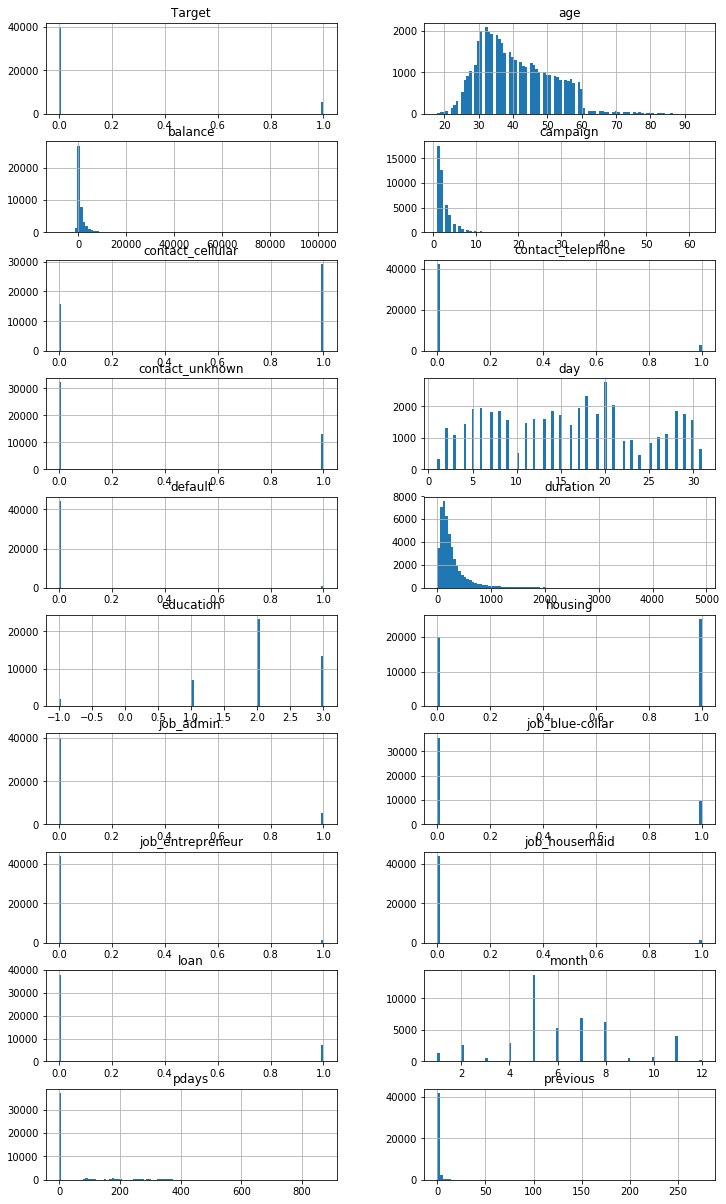

In [16]:
#Plotting the histogram to see the data distributions for non categorical variables 
columns = list(bankdata)[0:20]
bankdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

#The campaign, duration and previous are evenly distributed

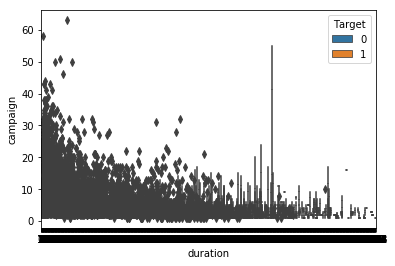

In [19]:
#Checking the duration and campaign have an impact on the Term deposit
sns.boxplot(bankdata['duration'], bankdata['campaign'], hue=bankdata['Target'])
#looks the duration and campaign has inversely proprotional 

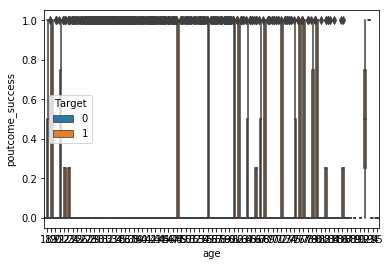

In [20]:
#Checking the age and success outcome of the campaign has an impact on Term deposit
sns.boxplot(bankdata['age'], bankdata['poutcome_success'], hue=bankdata['Target'])
#Looks age has no impact on the outcome as its widely spread

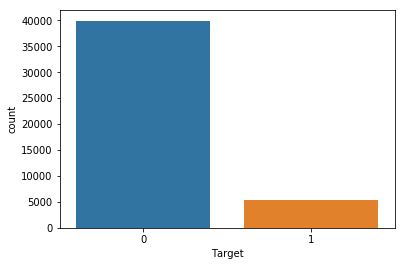

In [22]:
#Checking how many took the term deposit versus not
sns.countplot(bankdata['Target'])
#Looks like less than 10% have taken term deposit

In [10]:
# Lets do a correlation map to check the weak and strong coorleation
bankdata.corr()
#Default, Housing and loan have a negative coorleation with the Term deposit. It can be due to the lack of Funds 
# Suprisingly campaign has a negative impact to the Target column. It can be because the number of calls made to customer could habe annoyed them
# Married have a negative corelation with the target may be its becuase its due to more commitments
# Outcome success and duration with the client seems to have good positive coorelation which indicates more engagemnt with customers and good marketing capaign can drive term deposit

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
age,1.000000,-0.165066,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,0.092903,-0.004648,0.004760,...,0.021792,0.086650,-0.023571,0.447378,-0.008093,-0.065780,-0.197302,-0.068632,0.000412,0.050200
education,-0.165066,1.000000,-0.007522,0.041163,-0.022908,0.014705,0.018659,0.061910,0.002353,-0.001087,...,0.033806,-0.091973,0.397387,-0.093239,0.074105,-0.057147,-0.056420,0.061353,-0.011764,-0.122750
default,-0.017879,-0.007522,1.000000,-0.066745,-0.006025,0.077234,0.009424,0.014989,-0.010021,0.016822,...,0.026281,-0.000359,-0.002655,-0.011290,0.004107,0.000068,-0.016222,-0.003089,0.006470,-0.006669
balance,0.097783,0.041163,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.094605,0.021560,-0.014578,...,0.009642,0.001661,0.067797,0.046900,0.017850,-0.038151,0.001233,-0.016183,0.009023,0.010784
housing,-0.185513,-0.022908,-0.006025,-0.068768,1.000000,0.041323,-0.027982,-0.173887,0.005075,-0.023599,...,0.010600,-0.079380,-0.063382,-0.156633,-0.027319,0.070435,-0.085066,-0.012823,-0.048229,-0.075023
loan,-0.015655,0.014705,0.077234,-0.084350,0.041323,1.000000,0.011370,0.021638,-0.012412,0.009980,...,0.039808,-0.017234,-0.038904,-0.014861,-0.007882,0.035575,-0.058503,0.014798,-0.035961,-0.031943
day,-0.009120,0.018659,0.009424,0.004503,-0.027982,0.011370,1.000000,0.101989,-0.030206,0.162490,...,-0.002312,0.003955,0.019021,-0.010123,0.005062,-0.006531,-0.015894,0.032517,-0.006382,-0.011199
month,0.092903,0.061910,0.014989,0.094605,-0.173887,0.021638,0.101989,1.000000,-0.011866,0.054868,...,0.025128,0.031249,0.080438,0.024953,0.026396,-0.040318,-0.018733,0.037859,-0.040271,0.009391
duration,-0.004648,0.002353,-0.010021,0.021560,0.005075,-0.012412,-0.030206,-0.011866,1.000000,-0.084570,...,-0.001327,-0.008046,-0.008323,0.026032,0.007383,0.001427,-0.006504,-0.009176,0.020322,-0.006390
campaign,0.004760,-0.001087,0.016822,-0.014578,-0.023599,0.009980,0.162490,0.054868,-0.084570,1.000000,...,0.002128,0.003097,0.016686,-0.030913,0.005479,-0.004671,-0.021813,0.020739,-0.018448,0.014091


In [11]:
def plot_corr(df, size=40):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

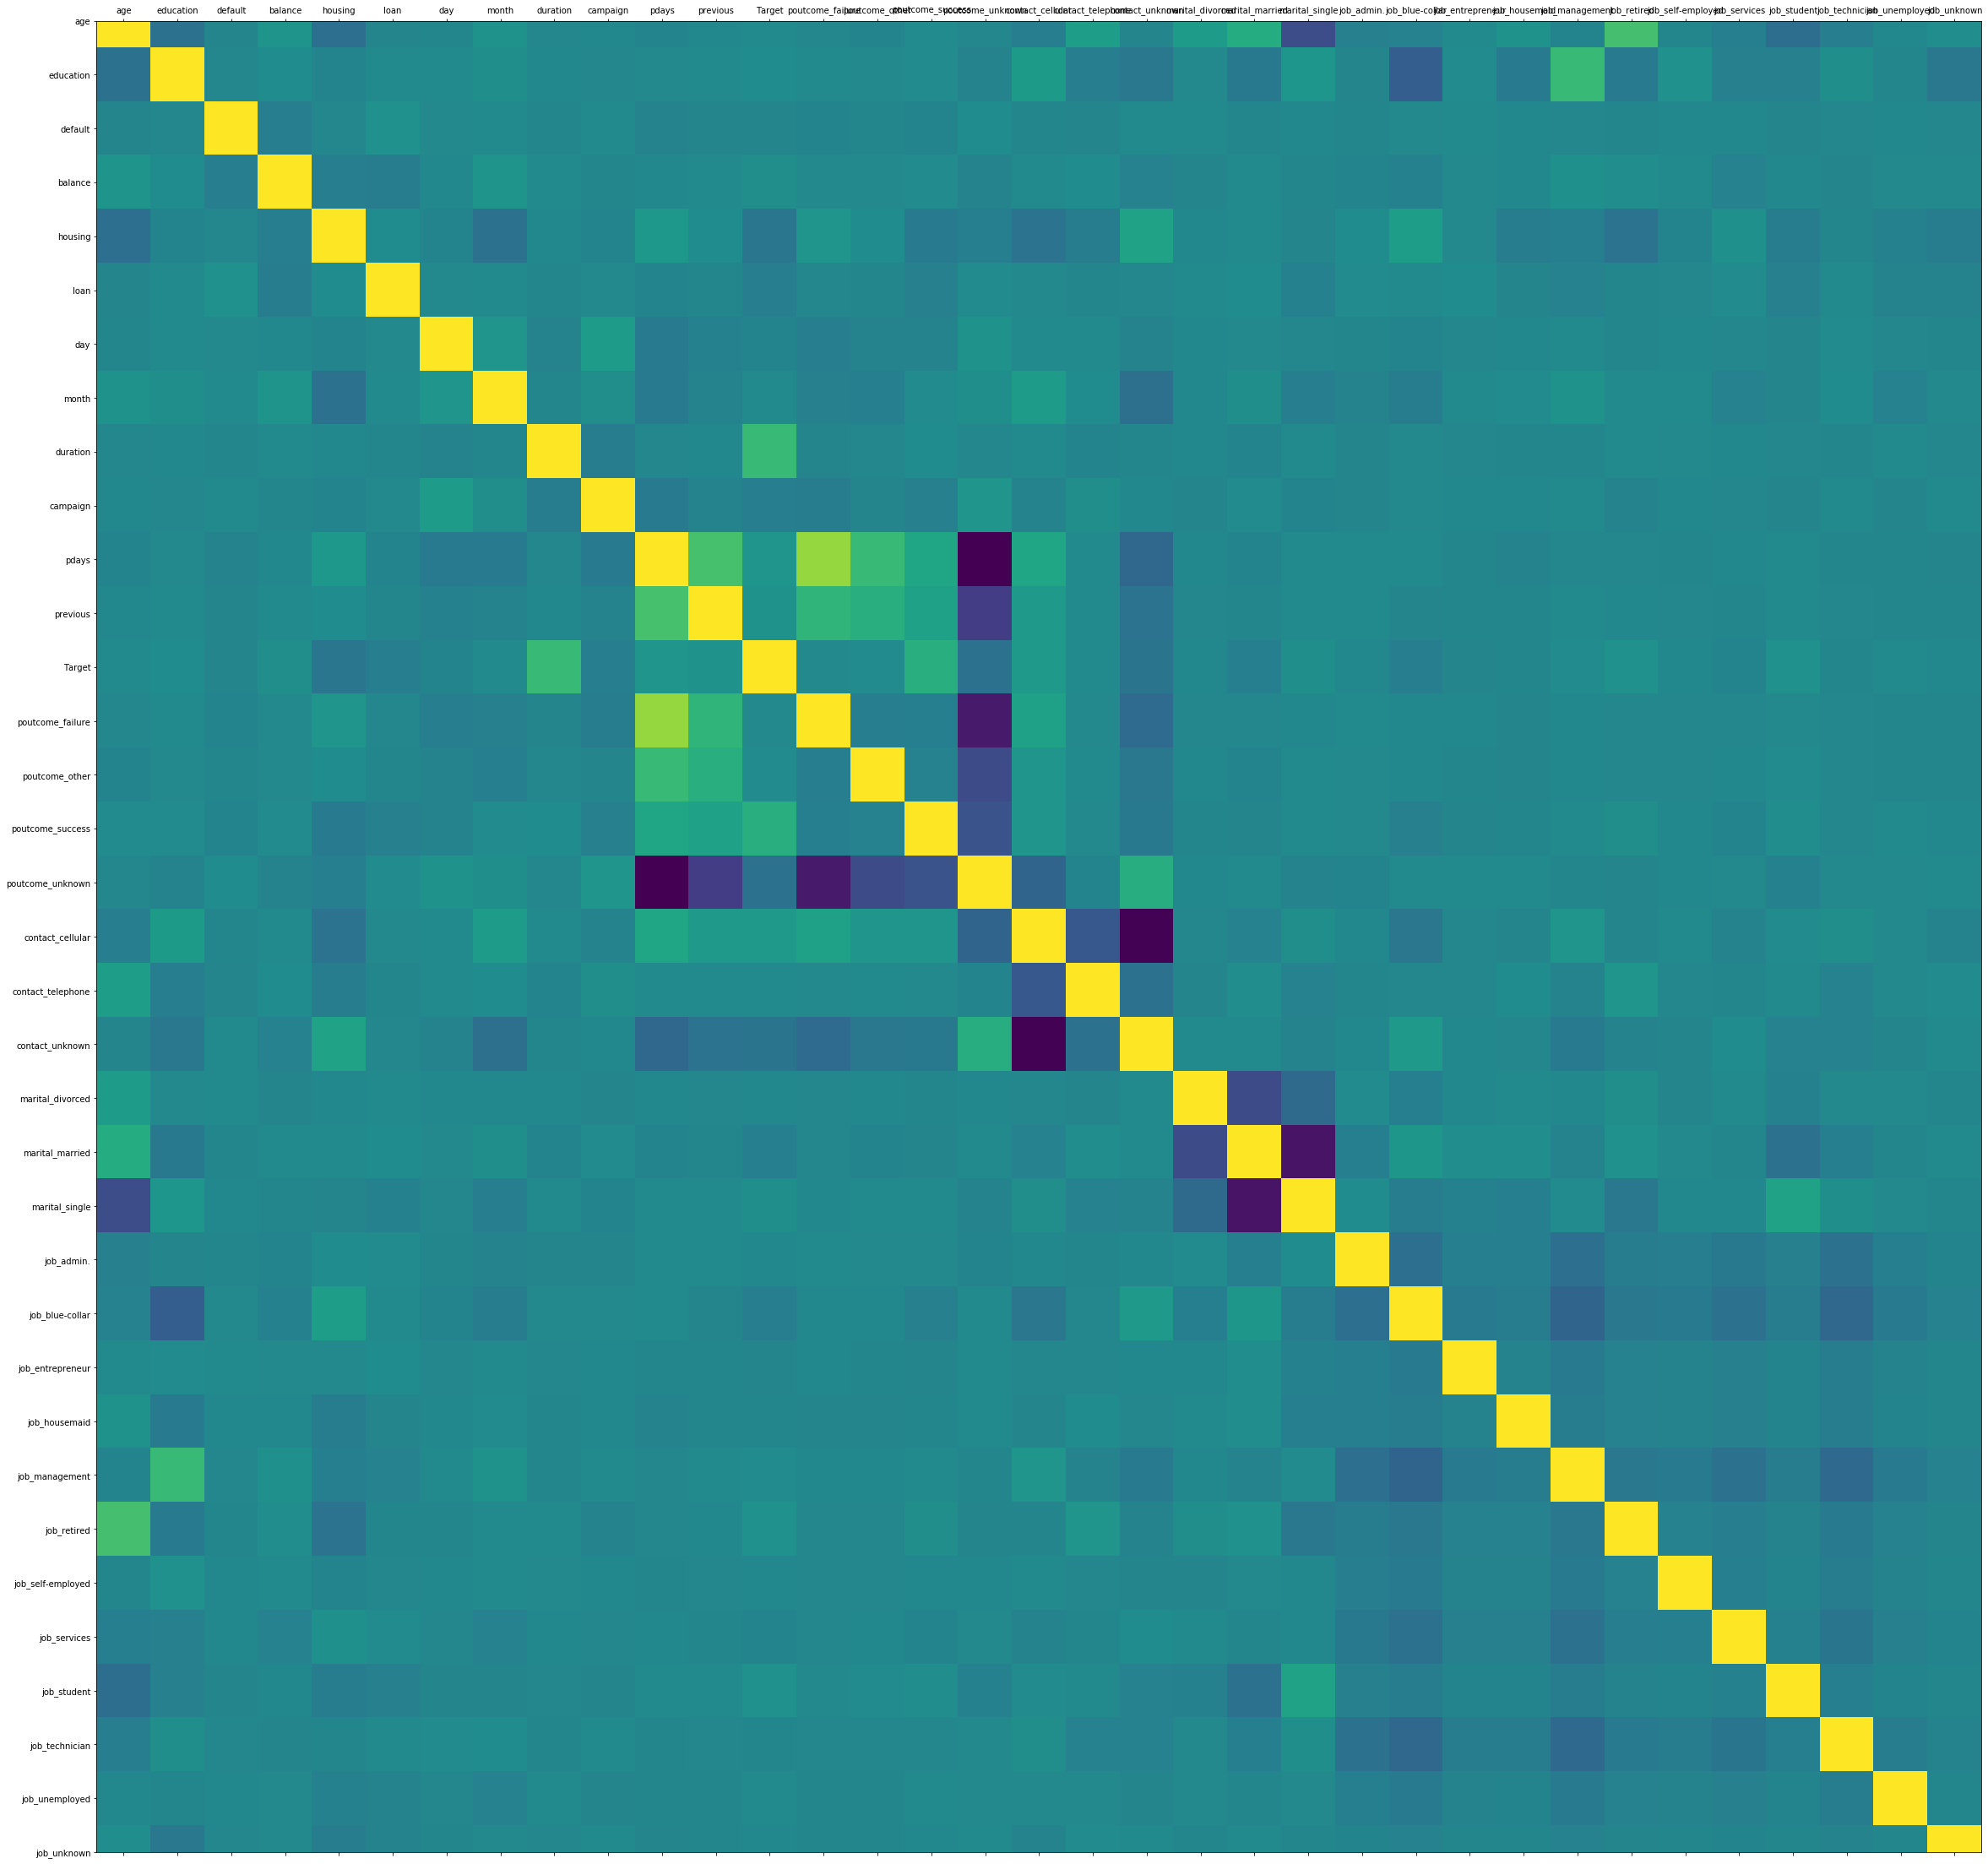

In [12]:
plot_corr(bankdata)

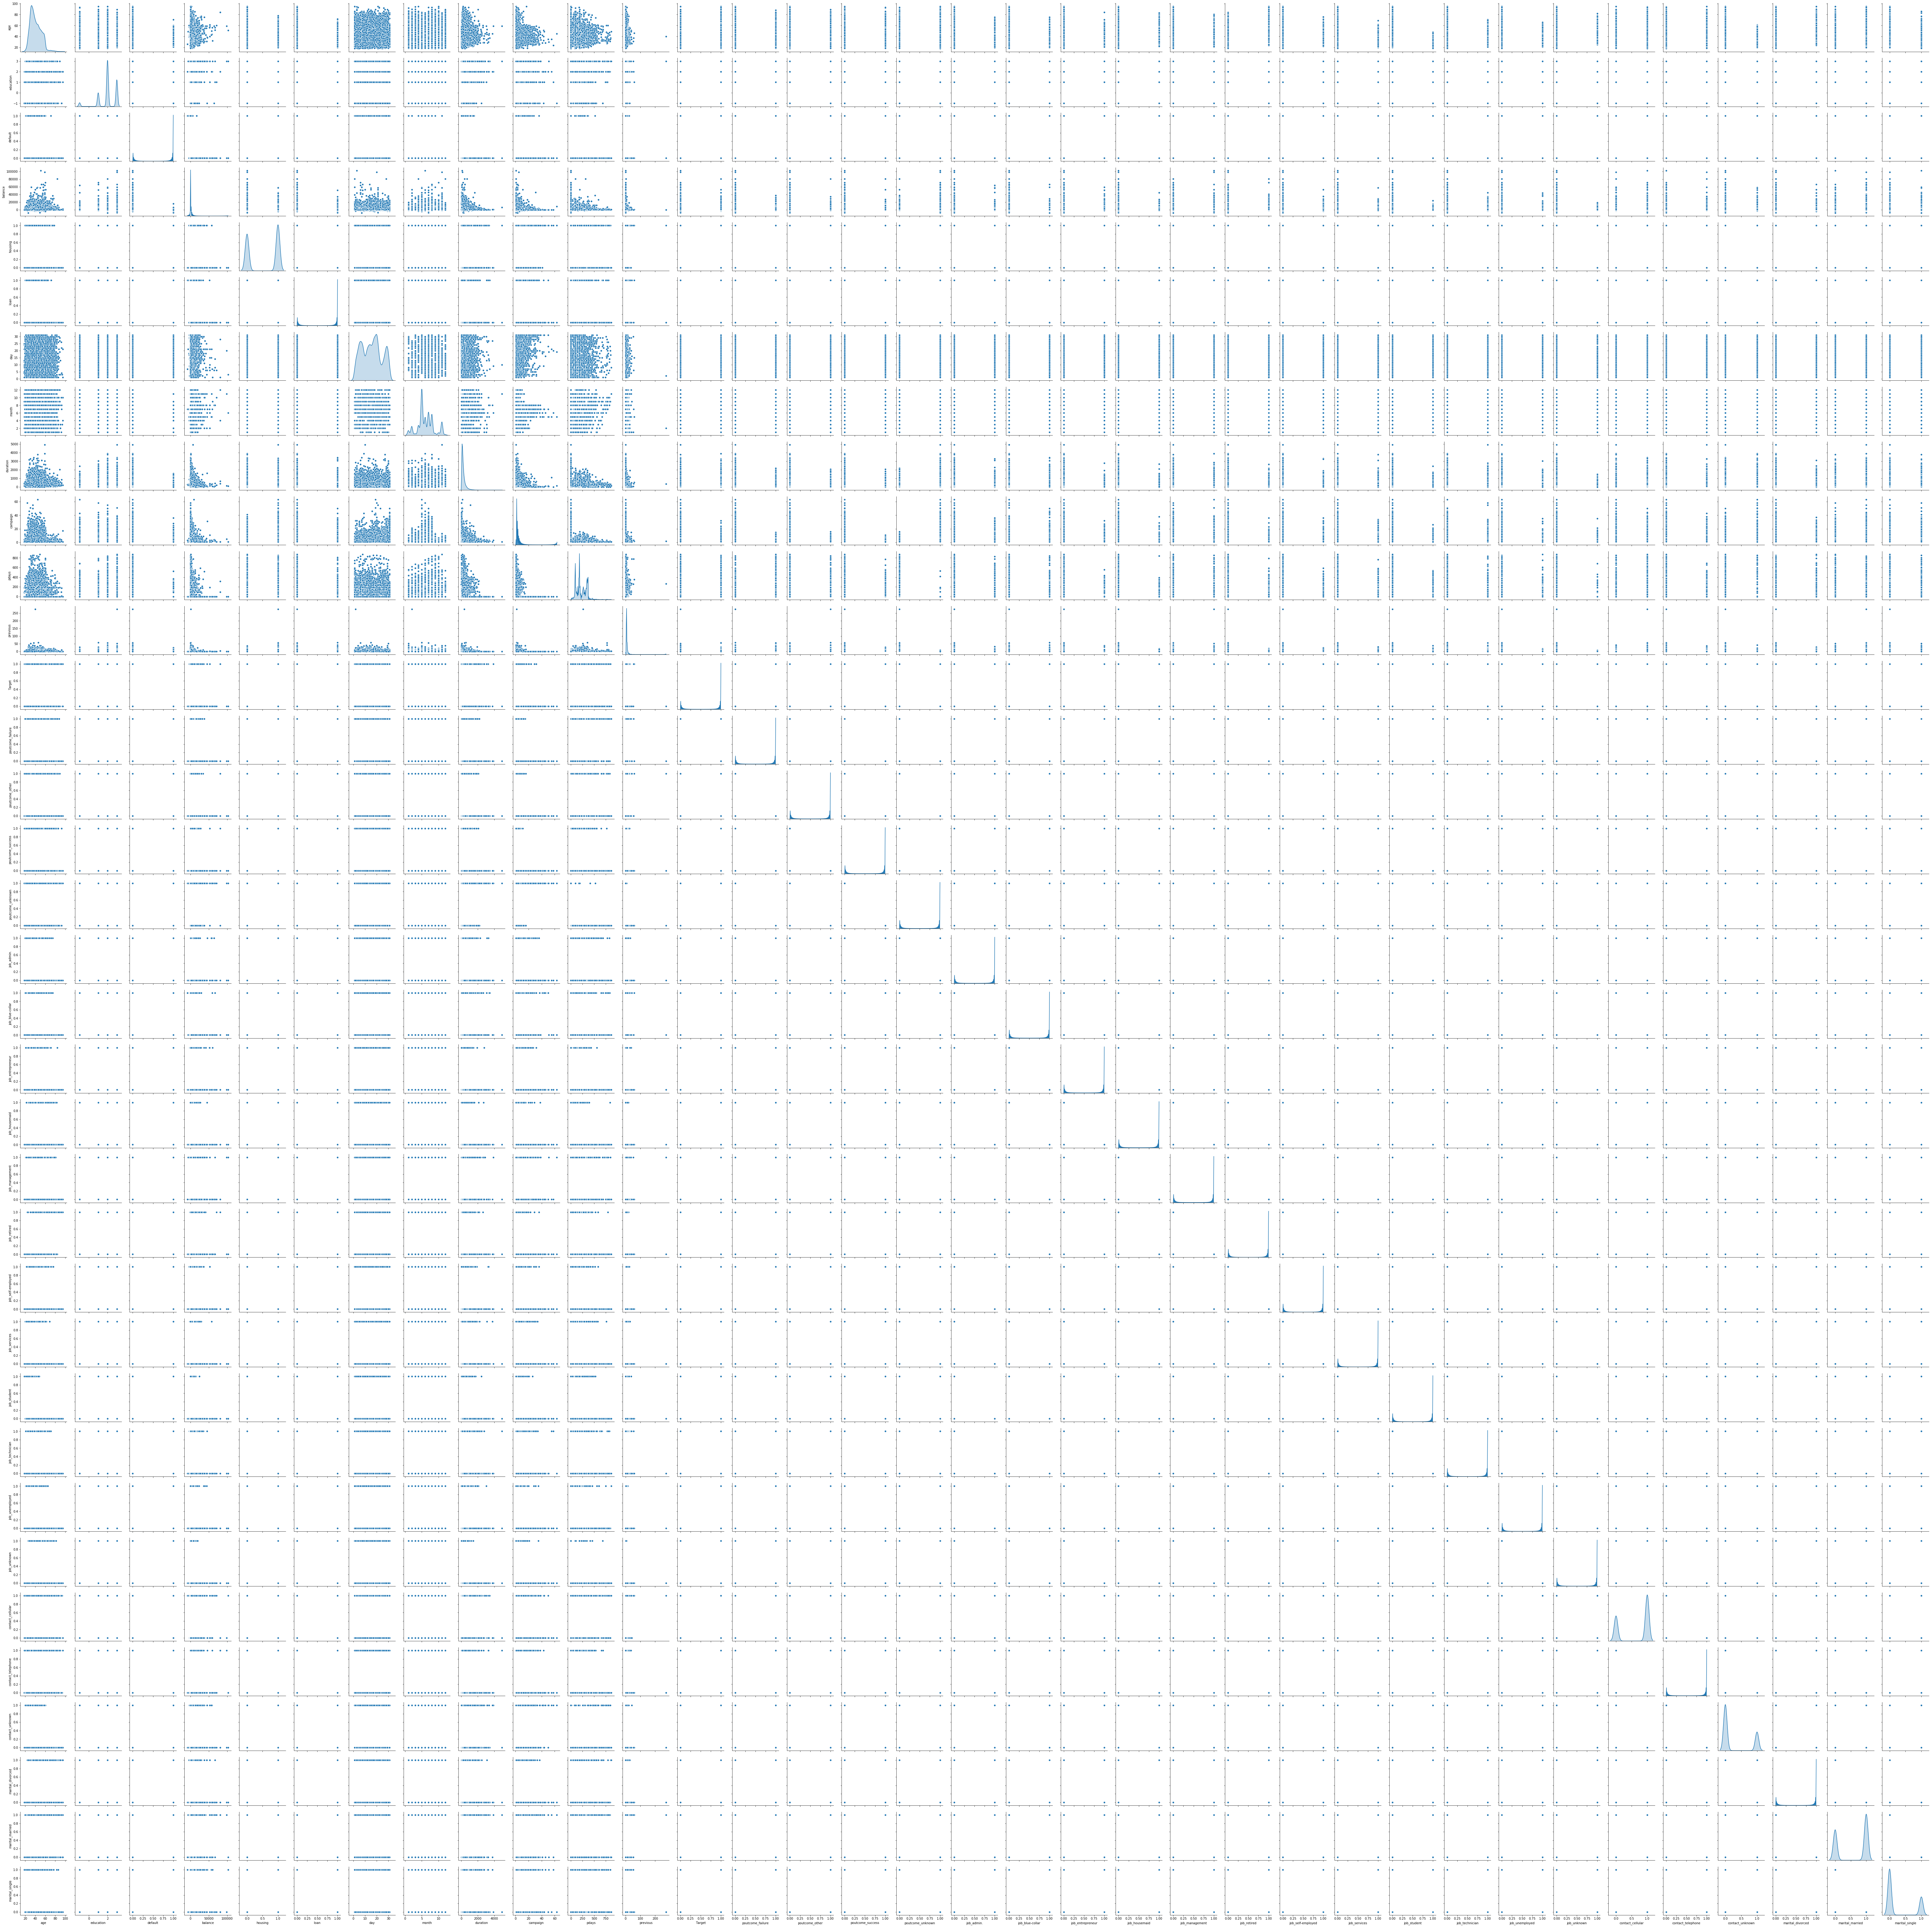

In [16]:
#Lets Futher check the data using pairplot 
sns.pairplot(bankdata,diag_kind="kde")

# Splitting Training and Testing data

In [13]:
#Preparing the data for the model. Since Personal loan is the prediction column assign it to Y
x= bankdata.drop(['Target'],axis=1)
y = bankdata['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

x_train.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
6149,32,2,1,-238,1,0,27,5,427,1,...,0,0,0,0,0,0,0,0,0,0
12403,34,2,0,-478,1,1,27,6,111,4,...,0,0,0,0,0,0,0,0,0,0
21645,32,2,0,266,1,0,19,8,168,2,...,0,0,0,0,0,0,0,1,0,0
29580,36,2,1,13,0,1,3,2,150,4,...,0,0,0,0,0,0,0,0,0,0
31245,23,2,0,486,0,0,3,3,87,1,...,0,0,0,0,0,0,1,0,0,0


# Logistic Regression Model

In [63]:
#Fit a logisitic regression model on train data
Tdeposit_lr_model = LogisticRegression(solver='liblinear')
Tdeposit_lr_model.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
#Predict on test 
y_predict = Tdeposit_lr_model.predict(x_test)

#Finding the coefficient and intercept 
coef_df = pd.DataFrame(Tdeposit_lr_model.coef_)
coef_df['intercept'] = Tdeposit_lr_model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.002668  0.078081 -0.275595  0.000022 -0.793632 -0.552719 -0.006461   

          7         8         9  ...        25        26        27        28  \
0 -0.011869  0.004154 -0.105609  ... -0.465252 -0.030769  0.548283 -0.298911   

         29        30        31        32        33  intercept  
0 -0.234675  0.609416 -0.184196 -0.262323 -0.049792  -1.114133  

[1 rows x 35 columns]


In [65]:
#Model score for training data
train_model_score = Tdeposit_lr_model.score(x_train,y_train)
print(train_model_score)

0.9003381047176667


In [66]:
#Model score for testing data
test_model_score = Tdeposit_lr_model.score(x_test,y_test)
print(test_model_score)

0.9007667354762607


Confusion Matrix


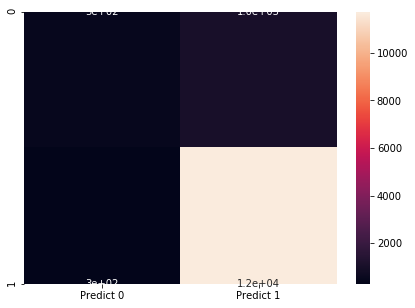

In [71]:
#Plotting the confusion Matrix 
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["0","1"]], columns =[i for i in["Predict 0", "Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
#Even though the model accuracy is good there is a significant number of TypeI and TypeII errors

# Naive Bayes Model

In [72]:
#Fitting the Naive bayes model on the training data
Tdeposit_nb_model = GaussianNB()
Tdeposit_nb_model.fit(x_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
#Performance of our model with training data
y_nb_predict_train = Tdeposit_nb_model.predict(x_train)

print( "Model Accuracy: {0:4f}".format(metrics.accuracy_score(y_train,y_nb_predict_train)))

Model Accuracy: 0.827567


In [73]:
#Performance of our model with testing data 

y_nb_predict_test = Tdeposit_nb_model.predict(x_test)
print( "Model Accuracy :{0:4f}".format(metrics.accuracy_score(y_test,y_nb_predict_test)))

Model Accuracy :0.828517


confusion matrix


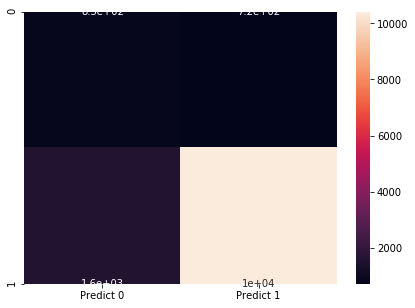

In [75]:
#Plotting Confusion matrix for Naive Bayes Model
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, y_nb_predict_test, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["0","1"]],columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True)
#It has more type I and type II errors than the logistic regression models

In [28]:
#Printing out the classification report to find out the precision and recall 
print("Classification report")
print(metrics.classification_report(y_test, y_nb_predict_test, labels=[1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.34      0.54      0.42      1551
           0       0.94      0.87      0.90     12013

   micro avg       0.83      0.83      0.83     13564
   macro avg       0.64      0.70      0.66     13564
weighted avg       0.87      0.83      0.84     13564



# KNN Model

In [77]:
#Building KNN model. Chose a KNN value as sqrt of n. Where n = 45211 and 70% is training data which is 31647 so sqrt is 178 
Tdeposit_knn_model_withoutZscore = KNeighborsClassifier(n_neighbors= 178, weights ='distance')
Tdeposit_knn_model_withoutZscore.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=178, p=2,
                     weights='distance')

In [78]:
#Predicting from the test data
y_predict_KNN = Tdeposit_knn_model_withoutZscore.predict(x_test)

#Checking model score train data 
Tdeposit_knn_model_withoutZscore.score(x_train,y_train)

1.0

In [80]:
#Checking model score test data
Tdeposit_knn_model_withoutZscore.score(x_test,y_test)

0.8897817752875258

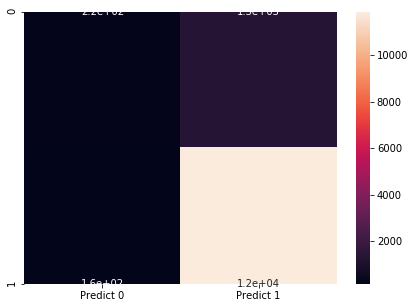

In [81]:
cm = metrics.confusion_matrix(y_test, y_predict_KNN, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["0","1"]], columns=[i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

# KNN Model with Z Score

In [82]:
#Building the KNN model with Z score
xscaled = x.apply(zscore)
xscaled.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,...,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,-3.427835e-14,4.520540e-15,3.070663e-15,1.382298e-14,-1.275129e-14,-9.219436e-15,-2.268775e-14,5.560938e-17,1.254699e-14,...,-1.268778e-14,1.467619e-14,-1.069598e-14,2.923681e-15,7.345708e-15,2.146629e-14,7.067255e-14,-5.119464e-15,-1.063336e-15,-4.888516e-15
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.344586e+00,-1.354899e-01,-3.081149e+00,-1.118674e+00,-4.368035e-01,-1.779108e+00,-2.136478e+00,-1.002478e+00,-5.693506e-01,...,-1.844147e-01,-1.679298e-01,-5.143318e-01,-2.296000e-01,-1.902342e-01,-3.180824e-01,-1.455566e-01,-4.494137e-01,-1.722663e-01,-8.006853e-02
25%,-7.473845e-01,-2.153577e-02,-1.354899e-01,-4.237719e-01,-1.118674e+00,-4.368035e-01,-9.380027e-01,-4.753536e-01,-6.025167e-01,-5.693506e-01,...,-1.844147e-01,-1.679298e-01,-5.143318e-01,-2.296000e-01,-1.902342e-01,-3.180824e-01,-1.455566e-01,-4.494137e-01,-1.722663e-01,-8.006853e-02
50%,-1.823406e-01,-2.153577e-02,-1.354899e-01,-3.002800e-01,8.939154e-01,-4.368035e-01,2.326031e-02,-6.007252e-02,-3.035165e-01,-2.465603e-01,...,-1.844147e-01,-1.679298e-01,-5.143318e-01,-2.296000e-01,-1.902342e-01,-3.180824e-01,-1.455566e-01,-4.494137e-01,-1.722663e-01,-8.006853e-02
75%,6.652252e-01,1.086148e+00,-1.354899e-01,2.158743e-02,8.939154e-01,-4.368035e-01,6.240497e-01,7.704897e-01,2.362370e-01,7.622994e-02,...,-1.844147e-01,-1.679298e-01,-5.143318e-01,-2.296000e-01,-1.902342e-01,-3.180824e-01,-1.455566e-01,-4.494137e-01,-1.722663e-01,-8.006853e-02
max,5.091402e+00,1.086148e+00,7.380625e+00,3.309478e+01,8.939154e-01,2.289359e+00,1.825628e+00,2.431614e+00,1.809470e+01,1.944365e+01,...,5.422561e+00,5.954871e+00,1.944270e+00,4.355402e+00,5.256679e+00,3.143839e+00,6.870179e+00,2.225121e+00,5.804965e+00,1.248930e+01


In [83]:
#Train and test data using the x scaled version
X_train, X_test, Y_train, Y_test = train_test_split(xscaled, y, test_size=0.30, random_state=1)

In [84]:
#Building KNN model
Tdeposit_zscore_knn_model = KNeighborsClassifier(n_neighbors= 200, weights ='distance')
Tdeposit_zscore_knn_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=200, p=2,
                     weights='distance')

In [85]:
#Predicting from the test data
Y_predict_KNN = Tdeposit_zscore_knn_model.predict(X_test)

#Checking model score train data 
Tdeposit_zscore_knn_model.score(X_train,Y_train)

1.0

In [86]:
#Checking model score test data
Tdeposit_zscore_knn_model.score(X_test,Y_test)

0.8958271896195813

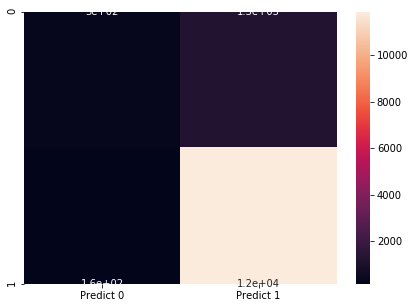

In [88]:
cm = metrics.confusion_matrix(Y_test, Y_predict_KNN, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["0","1"]], columns=[i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

# Decision Tree Model

In [35]:
#Building decision Tree model using Gini Impurity 
Tdeposit_dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
Tdeposit_dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [20]:
print(Tdeposit_dtree.score(x_train, y_train))
print(Tdeposit_dtree.score(x_test, y_test))

1.0
0.8728988498967856


In [59]:
conda install -c anaconda graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\premf\Anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.1.23  |                0         158 KB  anaconda
    certifi-2019.3.9           |           py37_0         155 KB  anaconda
    conda-4.7.12               |           py37_0         3.0 MB  anaconda
    conda-package-handling-1.3.11|           py37_0         280 KB  anaconda
    graphviz-2.38.0            |                4        37.7 MB  anaconda
    openssl-1.1.1b             |       he774522_1         5.7 MB  anaconda
    qt-5.9.7                   |   vc14h73c81de_0        92.3 MB  anaconda
    ------------------------------------------------------------
                                           Total:       139.3 MB

The following NEW packages will be INSTALLED:



==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda


'ET' is not recognized as an internal or external command,
operable program or batch file.


In [63]:
conda update -n base -c defaults conda

Solving environment: ...working... 
  - defaults::jupyter_console-5.2.0-py37_1, defaults::prompt_toolkit-3.0.2-py_0
  - defaults::jupyter_console-6.0.0-py37_0, defaults::prompt_toolkit-2.0.10-py_0done

## Package Plan ##

  environment location: C:\Users\premf\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           5 KB
    anaconda-project-0.8.4     |             py_0         215 KB
    asn1crypto-1.2.0           |           py37_0         162 KB
    astroid-2.3.3              |           py37_0         292 KB
    astropy-3.2.3              |   py37he774522_0         6.9 MB
    attrs-19.3.0               |             py_0          39 KB
    babel-2.7.0                |             py_0         5.8 MB
    backports-1.0              |             py_2         139 KB
    beautifulsoup4-4.8.1 

DEBUG menuinst_win32:__init__(199): Menu: name: 'Anaconda${PY_VER} ${PLATFORM}', prefix: 'C:\Users\premf\Anaconda3', env_name: 'None', mode: 'user', used_mode: 'user'
DEBUG menuinst_win32:create(323): Shortcut cmd is C:\Users\premf\Anaconda3\pythonw.exe, args are ['C:\\Users\\premf\\Anaconda3\\cwp.py', 'C:\\Users\\premf\\Anaconda3', 'C:\\Users\\premf\\Anaconda3\\pythonw.exe', 'C:\\Users\\premf\\Anaconda3\\Scripts\\spyder-script.py']
DEBUG menuinst_win32:create(323): Shortcut cmd is C:\Users\premf\Anaconda3\python.exe, args are ['C:\\Users\\premf\\Anaconda3\\cwp.py', 'C:\\Users\\premf\\Anaconda3', 'C:\\Users\\premf\\Anaconda3\\python.exe', 'C:\\Users\\premf\\Anaconda3\\Scripts\\spyder-script.py', '--reset']
DEBUG menuinst_win32:__init__(199): Menu: name: 'Anaconda${PY_VER} ${PLATFORM}', prefix: 'C:\Users\premf\Anaconda3', env_name: 'None', mode: 'user', used_mode: 'user'
DEBUG menuinst_win32:create(323): Shortcut cmd is C:\Users\premf\Anaconda3\python.exe, args are ['C:\\Users\\premf\\A

In [21]:
train_char_label = ['No','Yes']
Credit_Tree_File = open('credit_tree_dot','w')
dot_data = tree.export_graphviz(Tdeposit_dtree, out_file=Credit_Tree_File, feature_names=list(x_train), class_names=list(train_char_label))
Credit_Tree_File.close()

In [22]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 2


In [21]:
conda install -c rmg pydot

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\premf\Anaconda3

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydot-1.4.1                |           py37_0          43 KB
    ------------------------------------------------------------
                                           Total:          43 KB

The following NEW packages will be INSTALLED:

  pydot              pkgs/main/win-64::pydot-1.4.1-py37_0




pydot-1.4.1          | 43 KB     |            |   0% 
pydot-1.4.1          | 43 KB     | ###6       |  37% 
pydot-1.4.1          | 43 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


# Trying to reduce Overfitting

In [44]:
Tdeposit_dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
Tdeposit_dTreeR.fit(x_train, y_train)
print(Tdeposit_dTreeR.score(x_train, y_train))
print(Tdeposit_dTreeR.score(x_test, y_test))

0.9026132018832749
0.899955765260985


In [24]:
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(Tdeposit_dTreeR, out_file=Credit_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

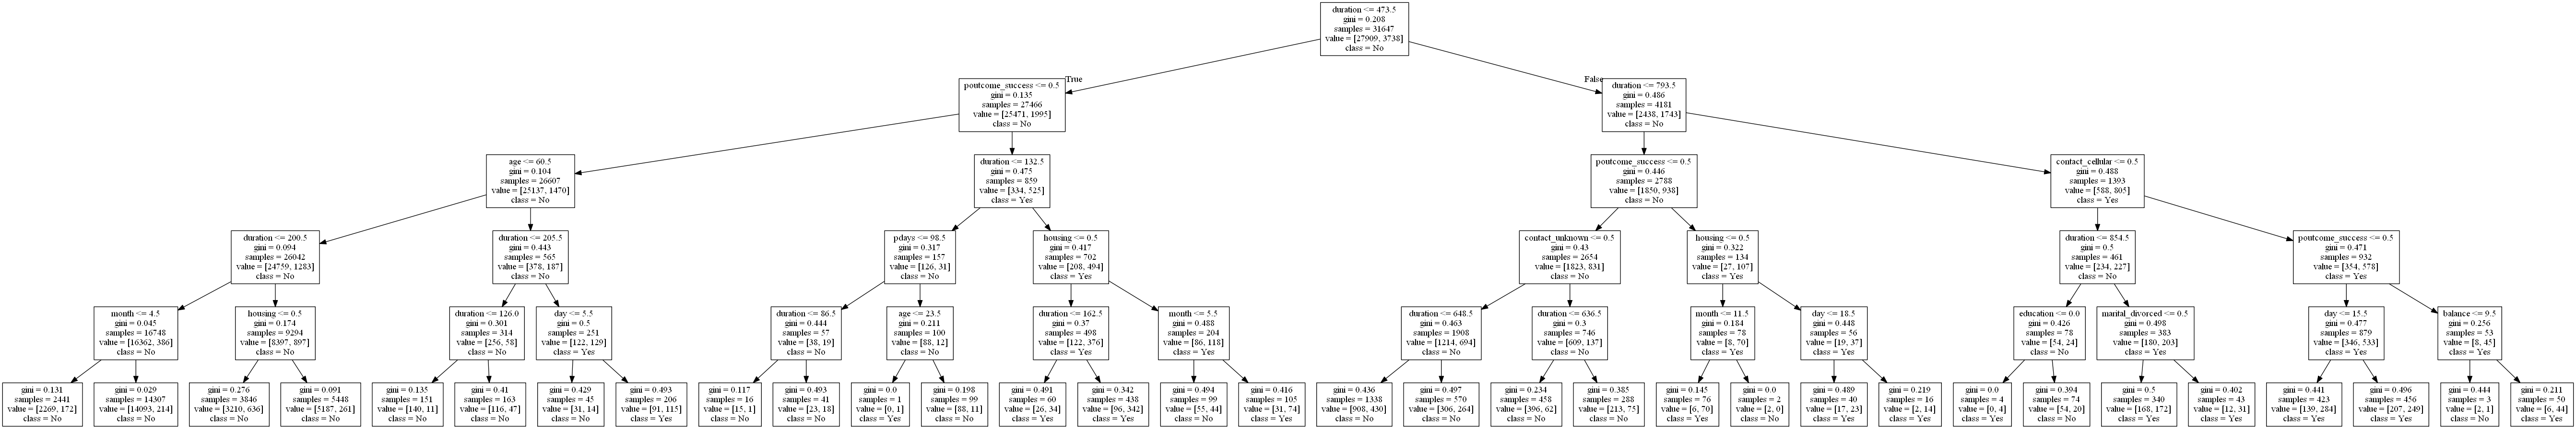

In [28]:
retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

In [26]:
print(pd.DataFrame(Tdeposit_dTreeR.feature_importances_, columns = ["Imp"], index=x_train.columns))

                        Imp
age                0.044428
education          0.002010
default            0.000000
balance            0.000841
housing            0.037243
loan               0.000000
day                0.006696
month              0.011469
duration           0.582990
campaign           0.000000
pdays              0.001643
previous           0.000000
poutcome_failure   0.000000
poutcome_other     0.000000
poutcome_success   0.288617
poutcome_unknown   0.000000
contact_cellular   0.005008
contact_telephone  0.000000
contact_unknown    0.017300
marital_divorced   0.001756
marital_married    0.000000
marital_single     0.000000
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000


0.899955765260985


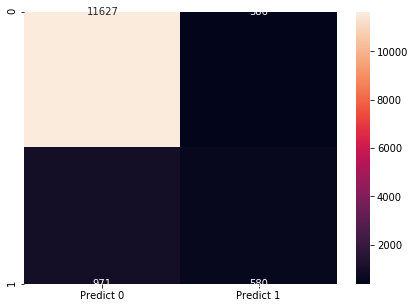

In [89]:
print(Tdeposit_dTreeR.score(x_test,y_test))
y_predict = Tdeposit_dTreeR.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0", "1"]], columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# Ensemble Learning - Bagging

In [130]:
from sklearn.ensemble import BaggingClassifier 

bgcl = BaggingClassifier(base_estimator=Tdeposit_dTreeR, n_estimators = 25, random_state =1)
bgcl = bgcl.fit(x_train, y_train)

In [131]:
y_predict = bgcl.predict(x_test)

0.9035682689472132


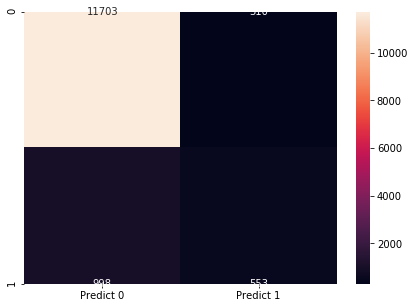

In [132]:
print(bgcl.score(x_test, y_test))
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]], columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt= 'g')

# Ensemble Learning - Ada Boosting

In [55]:
from sklearn.ensemble import AdaBoostClassifier
Tdeposit_AB = AdaBoostClassifier(base_estimator = Tdeposit_dTreeR, n_estimators=15, random_state=1)
Tdeposit_AB = Tdeposit_AB.fit(x_train, y_train)

0.9017988793866116


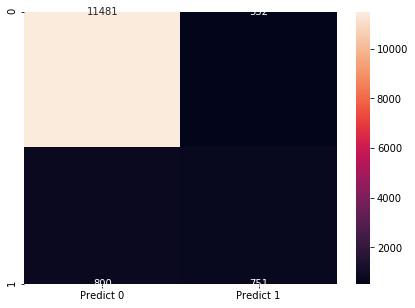

In [59]:
y_predict = Tdeposit_AB.predict(x_test)
print(Tdeposit_AB.score(x_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["0", "1"]], columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

# AdaBoost without a Base Model

In [133]:
from sklearn.ensemble import AdaBoostClassifier
Tdeposit_AB_W = AdaBoostClassifier(n_estimators=40, random_state=1)
Tdeposit_AB_W = Tdeposit_AB.fit(x_train, y_train)

0.8975228546151578


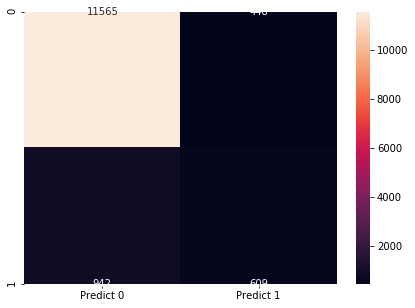

In [134]:
y_predict = Tdeposit_AB_W.predict(x_test)
print(Tdeposit_AB_W.score(x_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm_ad = pd.DataFrame(cm, index = [i for i in ["0", "1"]], columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_ad, annot=True, fmt='g')
#It has a done a good job in predicting more True negatives but it reduced the True positive and also increased the errors as well

# Ensemble Learning - Gradient Boost

In [99]:
from sklearn.ensemble import GradientBoostingClassifier 
Tdeposit_GB = GradientBoostingClassifier(n_estimators = 40, random_state = 1)
Tdeposit_GB = Tdeposit_GB.fit(x_train, y_train) 

In [100]:
y_predict = Tdeposit_GB.predict(x_test)

0.9030521969920378


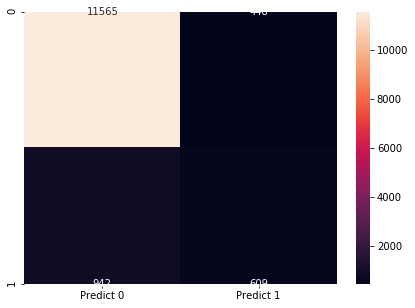

In [105]:
print(Tdeposit_GB.score(x_test,y_test))
cm = metrics.confusion_matrix(y_test, y_predict, labels =[0,1])
df_cm_gd = pd.DataFrame(cm, index = [i for i in ["0", "1"]], columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_gd, annot=True, fmt='g')

# Ensemble Learning - Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
Tdeposit_RF = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 15)
Tdeposit_RF = Tdeposit_RF.fit(x_train, y_train)

0.906664700678266


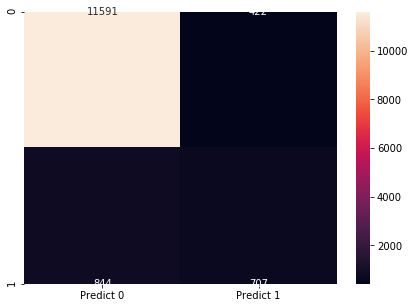

In [149]:
y_predict = Tdeposit_RF.predict(x_test)
print(Tdeposit_RF.score(x_test, y_test))
cm = metrics.confusion_matrix(y_test, y_predict, labels =[0,1])
df_cm_rf = pd.DataFrame(cm, index = [i for i in ["0", "1"]], columns = [i for i in ["Predict 0", "Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_rf, annot=True, fmt='g')

# Hyper Parameter - Applied across ensemble models and why

###### Max depth in the decision tree : 
    First performed without max depth though it gave an ideal model for training data when tested with testing data it didn't  help or not very close. Its due to it went very complex in training data to make in perfect model.so applied max depth to 7 to make it less complex and if you see the results its 0.90 and 0.89 between training and testing
###### Using Regularized Decision Tree in Bagging : 
    As bagging creates multiple models, using a Regularized model is better because TO use a simple model otherwise we may end up again overfitting the model and also the estimators have varied between 10 to 50 but it didn't make a significant difference in the output to sticked with 25
###### Base/WithoutBase model Ada Boosting : 
Tried out with both the base model and without base model to check if its makes a difference or not. Yes it made a difference but only on the True negatives but it reduce the True positives so it has to be weighted on case to case basis. In our scenario without base model didn't do a great job as we have to predict more people getting Term deposit which is True positive
###### No base model Gradient Boosting : 
    As it works on residuals it doesnt work very well with base models so letting it choose the base model is the best way 
###### Features in Random Classifier: 
    Its the features that are in the data provided. Increasing the features in the model actually increased the True negatives but it took a toll on True positives so took a median value so it gets balance between the TP and TN